In [17]:
# 这个的目的只是为了在神经网络中加入卷积层
# 至于卷积在图像中的应用需要继续深究
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [6]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [59]:
train_images[0].shape,train_labels.shape,test_labels.shape

((28, 28, 1), (60000,), (10000,))

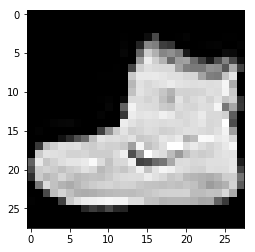

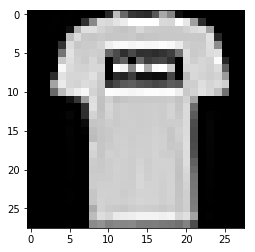

In [25]:
# 展示图像，0黑色，255白色 黑白图 图像为 28*28px
# 通过现在的理解说明，像素越高越清晰，像素越多说明图片越细节
plt.imshow(train_images[0],cmap='gray')
plt.show()
plt.imshow(train_images[1],cmap='gray')
plt.show()

In [26]:
import numpy as np
np.unique(train_labels)
# 一共是10个类别

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [27]:
train_images.shape

(60000, 28, 28)

In [45]:
train_images = train_images.reshape(-1, 28, 28, 1).astype(np.float32)
test_images = test_images.reshape(-1, 28, 28, 1).astype(np.float32)

In [46]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [2]:
model = keras.Sequential([
    keras.layers.Conv2D(32,3,3,activation=keras.activations.relu,input_shape=(28,28,1)),
    keras.layers.Conv2D(64,3,3,activation=keras.activations.relu),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation=keras.activations.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=keras.activations.softmax),
])
model.compile(
    optimizer=tf.train.AdamOptimizer(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)
model.summary()

NameError: name 'keras' is not defined

In [66]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

model.fit(
    train_images,
    train_labels,
    batch_size=32,
    epochs=1,
    verbose=1,
    validation_data=(test_images,test_labels),
)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)
Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 18s 305us/sample - loss: 1.0598 - acc: 0.6139 - val_loss: 0.6445 - val_acc: 0.7636


In [67]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_loss,test_acc

10000/10000 [==============================] - 1s 102us/sample - loss: 0.6445 - acc: 0.7636


(0.6445353229522706, 0.7636)

In [72]:
test_pred = model.predict(test_images)
print(np.argmax(test_pred[0]), test_labels[0])

9 9
